In [1]:
import numpy as np
from sklearn import datasets

digits = datasets.load_digits()

In [2]:
digits.target[0]

0

In [3]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [4]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

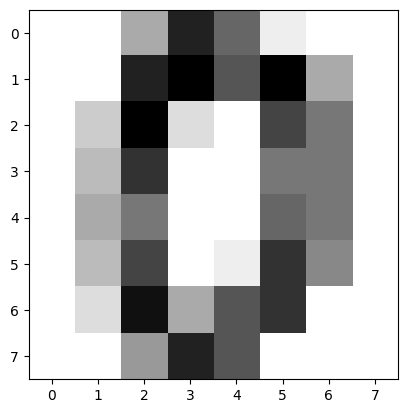

In [5]:
from matplotlib import pyplot as plt

%matplotlib inline

image1 = digits.images[0]
plt.imshow(image1, cmap=plt.cm.gray_r)

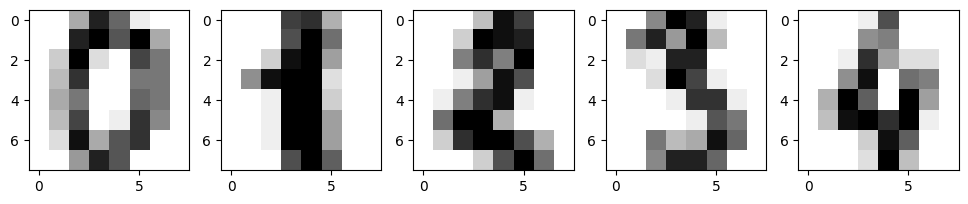

In [6]:
fig, axes = plt.subplots(1, 5, figsize=(12, 4))

for i in range(0, 5):
    image1 = digits.images[i]
    p = axes[i]
    p.imshow(image1, cmap=plt.cm.gray_r)

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size=0.2, random_state=30
)

len(X_train), len(y_train), len(X_test), len(y_test), np.mean(y_test[5:13])

(1437, 1437, 360, 360, 3.75)

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier


def mpl():
    """
    参数:无

    返回:
    model -- 人工神经网络模型
    score -- 测试集上的预测准确率
    """
    ### 代码开始 ### (≈ 2 行代码)
    model = MLPClassifier(
        hidden_layer_sizes=(100, 50),
        learning_rate_init=0.02,
        random_state=1,
        max_iter=100,
        learning_rate="constant",
    )
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    return model, score

In [19]:
mpl()[1]

0.9861111111111112

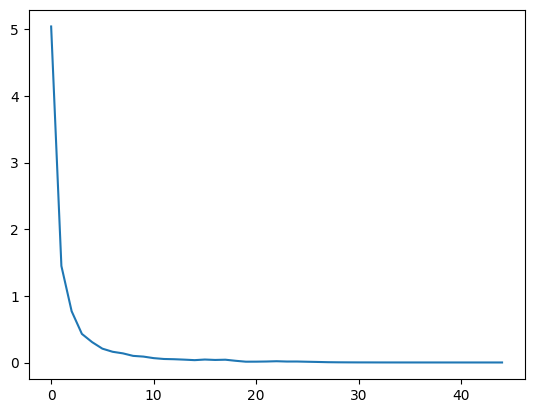

In [20]:
# 绘制损失变化曲线
model = mpl()[0]
plt.plot(model.loss_curve_)

In [ ]:
# 输出模型达到收敛的迭代次数
model.n_iter_